# Exercícios

1. Abra o vídeo `carphone.mp4` presente na sua pasta e pegue dois quadros consecutivos (exemplo: 100 e 101). Faça a subtração do segundo quadro com o primeiro. Quantize a imagem resultante (aula 14) com Δ=10. Aplique compressão RLE (aula 13) na imagem resultante e mostre a taxa de compressão (utilize o segundo quadro como original).

Dicas:
* Atente-se a *underflows* ao realizar a subtração. `np.int16` é um `dtype` adequado para armazenar a diferença;
* A quantidade de bytes utilizada em *array* `img` é dada por `img.nbytes`;
* Uma imagem `img` pode ser "achatada" utilizando `img.flatten()` para que seja utilizada no RLE;
* O algoritmo de RLE pode ser adaptado para *arrays* do `NumPy` trocando `not data` por `data.size == 0` e retornando um `np.array` ao final com o `dtype` apropriado.

In [1]:
import matplotlib.pyplot as plt
import moviepy.editor as mpe
import numpy as np

video = mpe.VideoFileClip("carphone.mp4")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


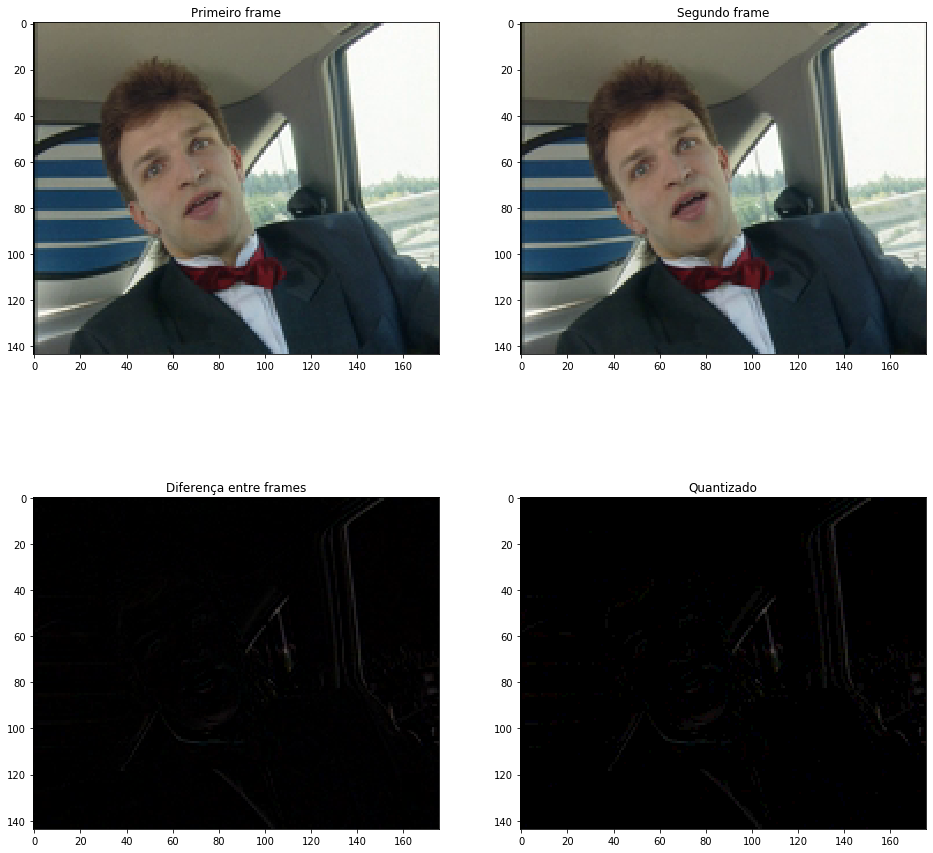

In [2]:
# Extração dos quadros 100 e 101:
frame_number = 100
frame0 = video.get_frame(frame_number / video.fps)
frame1 = video.get_frame((frame_number + 1) / video.fps)

# Diferença entre imagens:
frame_diff = frame1.astype(np.int16) - frame0.astype(np.int16)

# Quantização:
delta = 10
frame_quantized = (delta * np.floor(frame_diff / delta + 0.5)).astype(np.int16)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.title("Primeiro frame")
plt.imshow(frame0)

plt.subplot(2, 2, 2)
plt.title("Segundo frame")
plt.imshow(frame1)

plt.subplot(2, 2, 3)
plt.title("Diferença entre frames")
plt.imshow(frame_diff)

plt.subplot(2, 2, 4)
plt.title("Quantizado")
plt.imshow(frame_quantized)

In [3]:
def rle_encode(data):
    encoding = []
    if data.size == 0:
        return encoding

    prev = data[0]
    count = 0

    for value in data:
        if value != prev:
            encoding.append(count)
            encoding.append(prev)

            count = 1
            prev = value
        else:
            count += 1

    encoding.append(count)
    encoding.append(prev)
    return np.array(encoding, dtype=np.int16)

In [4]:
frame_rle = rle_encode(frame_quantized.flatten())

print("Tamanho original:", frame1.nbytes)
print("Tamanho comprimido:", frame_rle.nbytes)
print("Taxa de compressão:", frame1.nbytes / frame_rle.nbytes)

Tamanho original: 76032
Tamanho comprimido: 25152
Taxa de compressão: 3.0229007633587788


2. Desfaça o RLE, some-a com a imagem do primeiro quadro e exiba a imagem.

Dicas:
* O `flatten` pode ser desfeito utilizando `np.reshape(array, shape)`.

In [6]:
def rle_decode(data):
    output = []
    is_repeat = True
    for value in data:
        if is_repeat:
            repeat = value
        else:
            for _ in range(repeat):
                output.append(value)

        is_repeat = not is_repeat

    return np.array(output, dtype=np.int16)

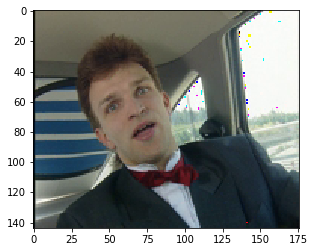

In [7]:
frame_decoded = np.reshape(rle_decode(frame_rle), frame0.shape)
frame_sum = (frame_decoded + frame0).astype(np.uint8)
plt.imshow(frame_sum)

# Referências
* https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/node245.html
* https://www.animemusicvideos.org/guides/avtech31/theory-videocompression.html
* https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0506/s0561282.pdf
* https://softwareengineering.stackexchange.com/questions/165872/what-are-mpeg-i-p-and-b-frames
* https://en.wikipedia.org/wiki/Motion_compensation
* https://en.wikipedia.org/wiki/Video_compression_picture_types

Aula remota, conforme Port. 345/2020 – MEC